In [ ]:
# 📊 Análisis Exploratorio de Datos (EDA)
# Sistema de Recomendación de Restaurantes - Lima
#
# **Dataset:** [Lima Restaurant Review - Kaggle](https://www.kaggle.com/datasets/bandrehc/lima-restaurant-review)
#
# **Fecha:** 2025-10-08
#
# ## Objetivos:
# 1. Explorar la estructura de los datos procesados
# 2. Analizar distribuciones de ratings y reviews
# 3. Identificar patrones y correlaciones
# 4. Análisis geoespacial de restaurantes en Lima
# 5. Análisis por categorías y distritos

In [6]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Crear carpeta para figuras
figures_path = Path('../docs/figures')
figures_path.mkdir(parents=True, exist_ok=True)

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


In [7]:
## 1. Carga de Datos Procesados
# Rutas de datos
DATA_PATH = Path('../data/processed')

# Cargar datasets procesados
df_limpio = pd.read_csv(DATA_PATH / 'restaurantes_limpio.csv')
df_sin_anomalias = pd.read_csv(DATA_PATH / 'restaurantes_sin_anomalias.csv')
df_alta_calidad = pd.read_csv(DATA_PATH / 'restaurantes_alta_calidad.csv')
df_reviews = pd.read_csv(DATA_PATH / 'reviews_limpio.csv')

print("📊 DATASETS CARGADOS:")
print(f"   - Restaurantes limpios: {df_limpio.shape}")
print(f"   - Sin anomalías: {df_sin_anomalias.shape}")
print(f"   - Alta calidad: {df_alta_calidad.shape}")
print(f"   - Reviews: {df_reviews.shape}")

# Usar dataset de alta calidad para análisis principal
df = df_alta_calidad.copy()
print(f"\n✅ Dataset principal: {df.shape[0]} restaurantes de alta calidad")

📊 DATASETS CARGADOS:
   - Restaurantes limpios: (1052, 16)
   - Sin anomalías: (1051, 20)
   - Alta calidad: (706, 23)
   - Reviews: (378969, 12)

✅ Dataset principal: 706 restaurantes de alta calidad


In [8]:
# Vista previa
df.head()

,restaurant_id,id_place,url_place,title,category,address,phone_number,complete_phone_number,domain,url,...,lat,long,category_clean,is_high_volume,distance_to_center_km,title_length,has_anomaly,popularity_score,quality_tier,review_tier
0,1,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,La 73,Restaurante,"Av. el Sol 175, Barranco 15063",(01) 2470780,+51 1 2470780,instagram.com,https://instagram.com/la73_barranco?utm_medium...,...,-12.139661,-77.023216,Restaurante,False,10.577793,5,False,5.63,Muy Bueno,Muy Alto
1,2,ChIJq6DzbfK3BZERzmnElUR7PUM,https://www.google.com/maps/place/?q=place_id:...,Pan Sal Aire,Restaurante,"Av. Almte. Miguel Grau 320, , Lima, Barranco 1...",951 118 993,+51 951 118 993,delivery.pansalaire.pe,https://delivery.pansalaire.pe/,...,-12.148280,-77.021087,Restaurante,False,11.562658,12,False,5.84,Excelente,Muy Alto
2,3,ChIJQwRnc-23BZERpyhQvLJVMTQ,https://www.google.com/maps/place/?q=place_id:...,Restaurante Javier,Restaurante peruano,"Bajada de Baños 408, Barranco 15063",984 799 808,+51 984 799 808,www.restaurantejavier.pe,https://www.restaurantejavier.pe/,...,-12.149831,-77.023228,Peruano,True,11.684607,18,False,6.11,Muy Bueno,Muy Alto
3,4,ChIJbYWvNb63BZER3Mb9WXTrobo,https://www.google.com/maps/place/?q=place_id:...,Nuestro Bistro,Restaurante,"Jr. Colina 107, Barranco 15063",948 721 346,+51 948 721 346,www.instagram.com,https://www.instagram.com/nuestro_bistro/,...,-12.145981,-77.022046,Restaurante,False,11.290995,14,False,4.86,Excelente,Medio
4,5,ChIJQWG-5e63BZERioL90gT0vZ8,https://www.google.com/maps/place/?q=place_id:...,Cala Restaurante & Lounge,Restaurante,"Circuito de Playas, Barranco 15063",998 247 326,+51 998 247 326,No disponible,No disponible,...,-12.144648,-77.025753,Restaurante,True,11.068470,25,False,6.28,Muy Bueno,Muy Alto


In [9]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_id          706 non-null    int64  
 1   id_place               706 non-null    object 
 2   url_place              706 non-null    object 
 3   title                  706 non-null    object 
 4   category               706 non-null    object 
 5   address                706 non-null    object 
 6   phone_number           706 non-null    object 
 7   complete_phone_number  706 non-null    object 
 8   domain                 706 non-null    object 
 9   url                    706 non-null    object 
 10  stars                  706 non-null    float64
 11  reviews                706 non-null    int64  
 12  district               706 non-null    object 
 13  lat                    706 non-null    float64
 14  long                   706 non-null    float64
 15  catego

In [10]:
## 2. Estadísticas Descriptivas
# Estadísticas de variables numéricas
df[['stars', 'reviews', 'distance_to_center_km', 'popularity_score']].describe().round(2)

,stars,reviews,distance_to_center_km,popularity_score
count,706.00,706.00,706.00,706.00
mean,4.34,1275.20,7.79,5.16
std,0.20,1992.54,2.41,0.54
min,4.00,50.00,1.51,4.02
25%,4.20,213.25,5.74,4.73
50%,4.30,629.50,7.97,5.18
75%,4.50,1595.50,9.61,5.58
max,5.00,22080.00,14.50,6.55


In [11]:
# Resumen ejecutivo
print("="*70)
print("RESUMEN EJECUTIVO - RESTAURANTES DE LIMA")
print("="*70)
print(f"\n📍 Total de restaurantes: {len(df)}")
print(f"📍 Distritos únicos: {df['district'].nunique()}")
print(f"📍 Categorías únicas: {df['category_clean'].nunique()}")
print(f"\n⭐ Rating promedio: {df['stars'].mean():.2f}")
print(f"⭐ Rating mediana: {df['stars'].median():.2f}")
print(f"⭐ Rating mínimo: {df['stars'].min():.1f}")
print(f"⭐ Rating máximo: {df['stars'].max():.1f}")
print(f"\n💬 Total de reviews: {df['reviews'].sum():,}")
print(f"💬 Promedio de reviews: {df['reviews'].mean():.0f}")
print(f"💬 Mediana de reviews: {df['reviews'].median():.0f}")
print(f"\n📏 Distancia promedio al centro: {df['distance_to_center_km'].mean():.2f} km")
print(f"📏 Distancia máxima: {df['distance_to_center_km'].max():.2f} km")
print(f"\n🏆 Popularity score promedio: {df['popularity_score'].mean():.2f}")
print("="*70)

RESUMEN EJECUTIVO - RESTAURANTES DE LIMA

📍 Total de restaurantes: 706
📍 Distritos únicos: 7
📍 Categorías únicas: 14

⭐ Rating promedio: 4.34
⭐ Rating mediana: 4.30
⭐ Rating mínimo: 4.0
⭐ Rating máximo: 5.0

💬 Total de reviews: 900,294
💬 Promedio de reviews: 1275
💬 Mediana de reviews: 630

📏 Distancia promedio al centro: 7.79 km
📏 Distancia máxima: 14.50 km

🏆 Popularity score promedio: 5.16


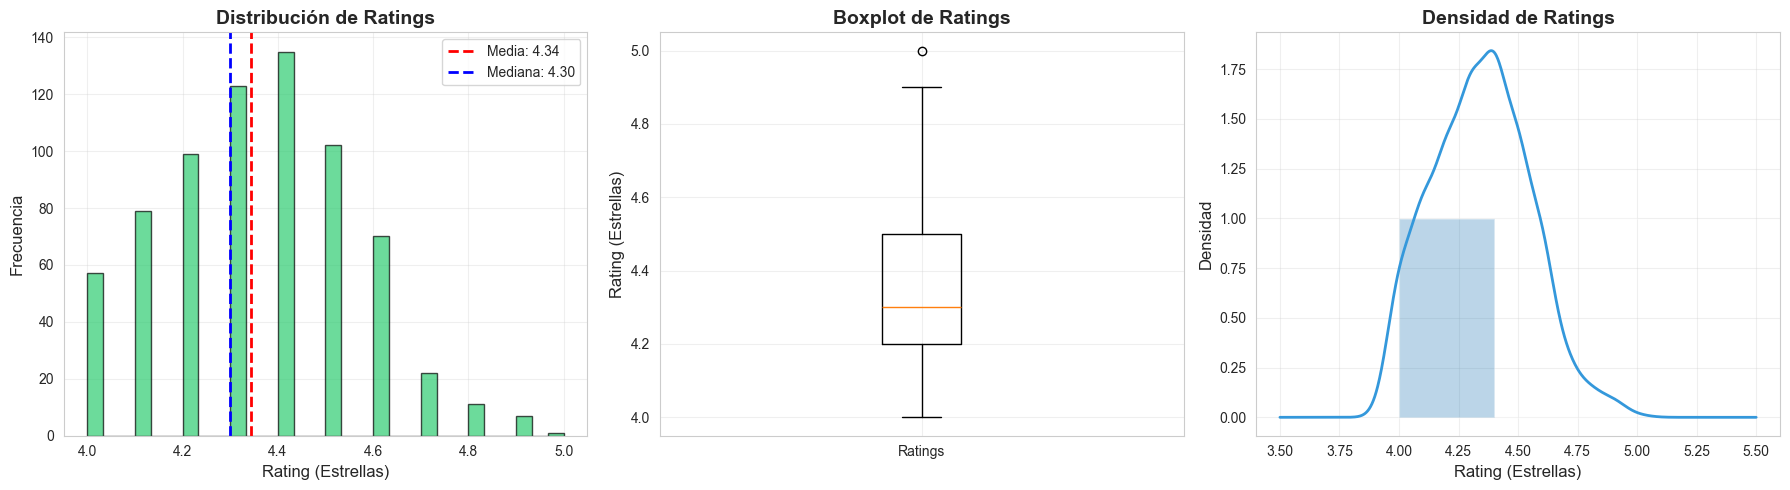


📊 Análisis de Ratings:
   - Desviación estándar: 0.202
   - Coeficiente de variación: 4.66%
   - Skewness (asimetría): 0.223
   - Kurtosis: -0.319


In [12]:
## 3. Análisis de Distribuciones
### 3.1 Distribución de Ratings
# Visualización 1: Distribución de Ratings
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
axes[0].hist(df['stars'], bins=30, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[0].axvline(df['stars'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {df["stars"].mean():.2f}')
axes[0].axvline(df['stars'].median(), color='blue', linestyle='--', linewidth=2,
                label=f'Mediana: {df["stars"].median():.2f}')
axes[0].set_xlabel('Rating (Estrellas)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Ratings', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['stars'], vert=True)
axes[1].set_ylabel('Rating (Estrellas)', fontsize=12)
axes[1].set_title('Boxplot de Ratings', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Ratings'])
axes[1].grid(alpha=0.3)

# KDE (Kernel Density Estimation)
df['stars'].plot(kind='kde', ax=axes[2], linewidth=2, color='#3498db')
axes[2].fill_between(df['stars'].values, 0, 1, alpha=0.3)
axes[2].set_xlabel('Rating (Estrellas)', fontsize=12)
axes[2].set_ylabel('Densidad', fontsize=12)
axes[2].set_title('Densidad de Ratings', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(figures_path / 'distribucion_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Análisis de Ratings:")
print(f"   - Desviación estándar: {df['stars'].std():.3f}")
print(f"   - Coeficiente de variación: {(df['stars'].std()/df['stars'].mean())*100:.2f}%")
print(f"   - Skewness (asimetría): {df['stars'].skew():.3f}")
print(f"   - Kurtosis: {df['stars'].kurtosis():.3f}")

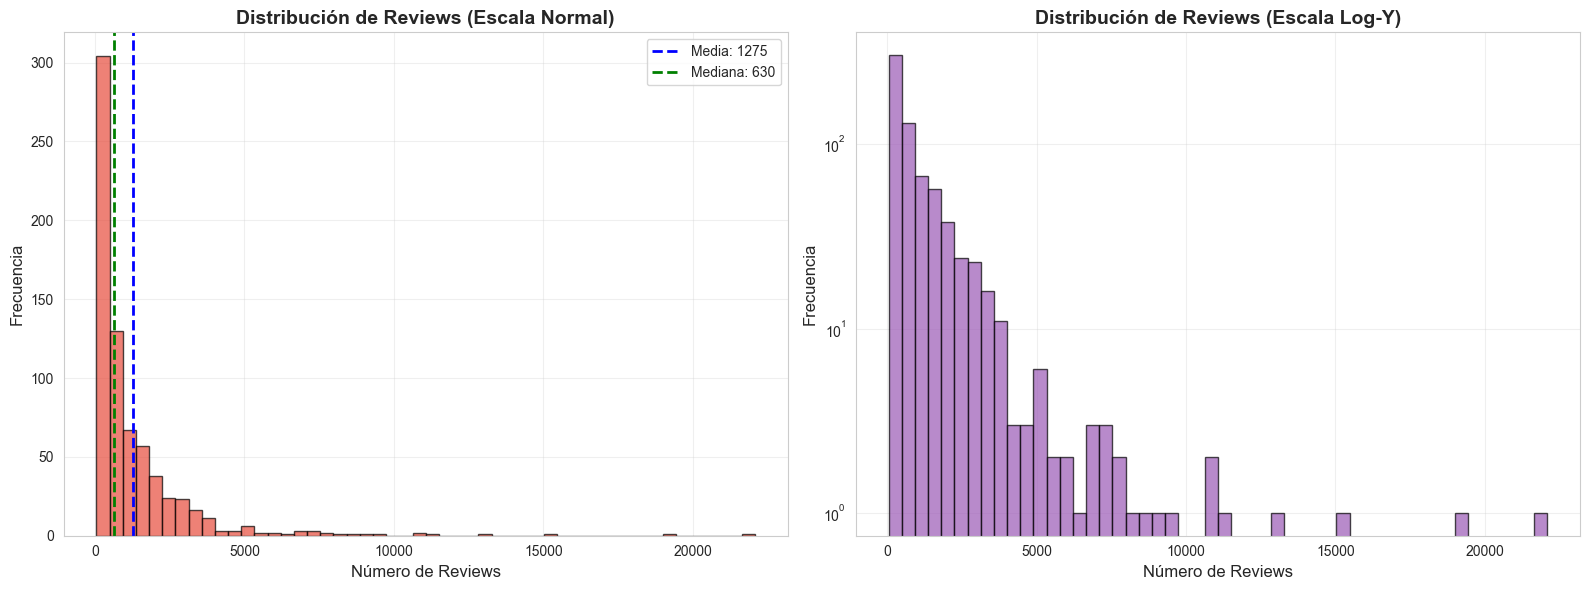


📊 Análisis de Reviews (Long-tail Distribution):
   - Desviación estándar: 1993
   - Percentil 25%: 213
   - Percentil 50%: 630
   - Percentil 75%: 1596
   - Percentil 90%: 2973
   - Top 10% reviews > 2973


In [13]:
### 3.2 Distribución de Reviews
# Visualización 2: Distribución de Reviews
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma normal
axes[0].hist(df['reviews'], bins=50, edgecolor='black', alpha=0.7, color='#e74c3c')
axes[0].axvline(df['reviews'].mean(), color='blue', linestyle='--', linewidth=2,
                label=f'Media: {df["reviews"].mean():.0f}')
axes[0].axvline(df['reviews'].median(), color='green', linestyle='--', linewidth=2,
                label=f'Mediana: {df["reviews"].median():.0f}')
axes[0].set_xlabel('Número de Reviews', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Reviews (Escala Normal)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histograma en escala logarítmica
axes[1].hist(df['reviews'], bins=50, edgecolor='black', alpha=0.7, color='#9b59b6')
axes[1].set_xlabel('Número de Reviews', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('Distribución de Reviews (Escala Log-Y)', fontsize=14, fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(figures_path / 'distribucion_reviews.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Análisis de Reviews (Long-tail Distribution):")
print(f"   - Desviación estándar: {df['reviews'].std():.0f}")
print(f"   - Percentil 25%: {df['reviews'].quantile(0.25):.0f}")
print(f"   - Percentil 50%: {df['reviews'].quantile(0.50):.0f}")
print(f"   - Percentil 75%: {df['reviews'].quantile(0.75):.0f}")
print(f"   - Percentil 90%: {df['reviews'].quantile(0.90):.0f}")
print(f"   - Top 10% reviews > {df['reviews'].quantile(0.90):.0f}")

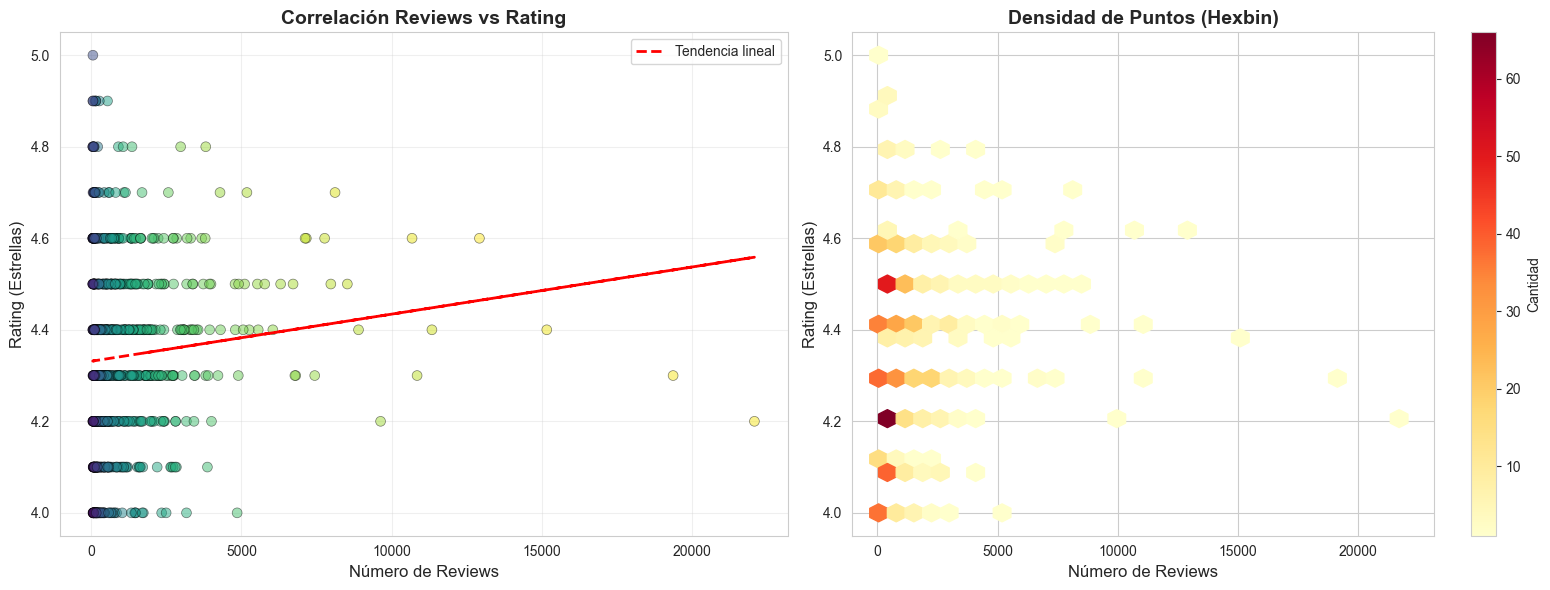


📊 Correlaciones Reviews vs Rating:
   - Pearson: 0.101
   - Spearman: 0.122

💡 Interpretación: Correlación débil
   → La popularidad (reviews) NO está fuertemente relacionada con la calidad (rating)


In [14]:
## 4. Análisis Bivariado
### 4.1 Correlación Reviews vs Rating
# Visualización 3: Scatter Plot Reviews vs Rating
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot normal
axes[0].scatter(df['reviews'], df['stars'], alpha=0.5, s=50, c=df['popularity_score'],
                cmap='viridis', edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Número de Reviews', fontsize=12)
axes[0].set_ylabel('Rating (Estrellas)', fontsize=12)
axes[0].set_title('Correlación Reviews vs Rating', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(df['reviews'], df['stars'], 1)
p = np.poly1d(z)
axes[0].plot(df['reviews'], p(df['reviews']), "r--", linewidth=2, label='Tendencia lineal')
axes[0].legend()

# Hexbin plot
hb = axes[1].hexbin(df['reviews'], df['stars'], gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Número de Reviews', fontsize=12)
axes[1].set_ylabel('Rating (Estrellas)', fontsize=12)
axes[1].set_title('Densidad de Puntos (Hexbin)', fontsize=14, fontweight='bold')
plt.colorbar(hb, ax=axes[1], label='Cantidad')

plt.tight_layout()
plt.savefig(figures_path / 'correlacion_reviews_rating.png', dpi=300, bbox_inches='tight')
plt.show()

# Calcular correlaciones
pearson_corr = df[['reviews', 'stars']].corr().iloc[0, 1]
spearman_corr = df[['reviews', 'stars']].corr(method='spearman').iloc[0, 1]

print(f"\n📊 Correlaciones Reviews vs Rating:")
print(f"   - Pearson: {pearson_corr:.3f}")
print(f"   - Spearman: {spearman_corr:.3f}")
print(f"\n💡 Interpretación: {'Correlación débil' if abs(pearson_corr) < 0.3 else 'Correlación moderada' if abs(pearson_corr) < 0.7 else 'Correlación fuerte'}")
print(f"   → La popularidad (reviews) {'NO' if abs(pearson_corr) < 0.3 else ''} está fuertemente relacionada con la calidad (rating)")

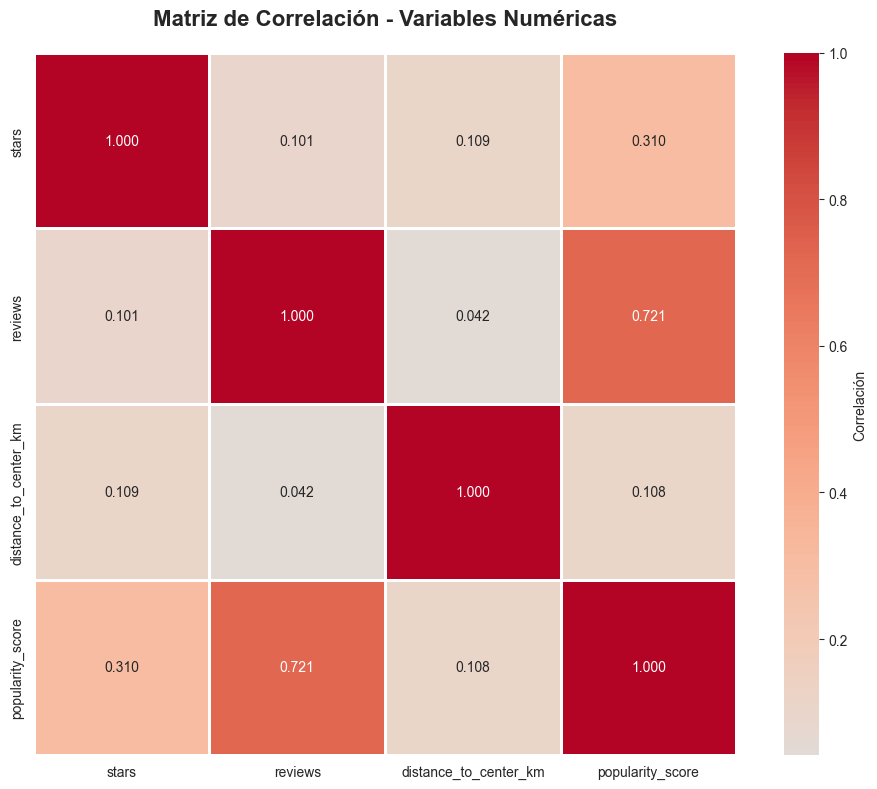


📊 Correlaciones más fuertes:
   - reviews vs popularity_score: 0.721
   - stars vs popularity_score: 0.310
   - stars vs distance_to_center_km: 0.109
   - distance_to_center_km vs popularity_score: 0.108
   - stars vs reviews: 0.101
   - reviews vs distance_to_center_km: 0.042


In [15]:
### 4.2 Matriz de Correlación
# Matriz de correlación de variables numéricas
numeric_cols = ['stars', 'reviews', 'distance_to_center_km', 'popularity_score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(figures_path / 'matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Correlaciones más fuertes:")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((
            corr_matrix.columns[i],
            corr_matrix.columns[j],
            corr_matrix.iloc[i, j]
        ))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in corr_pairs_sorted:
    print(f"   - {var1} vs {var2}: {corr:.3f}")

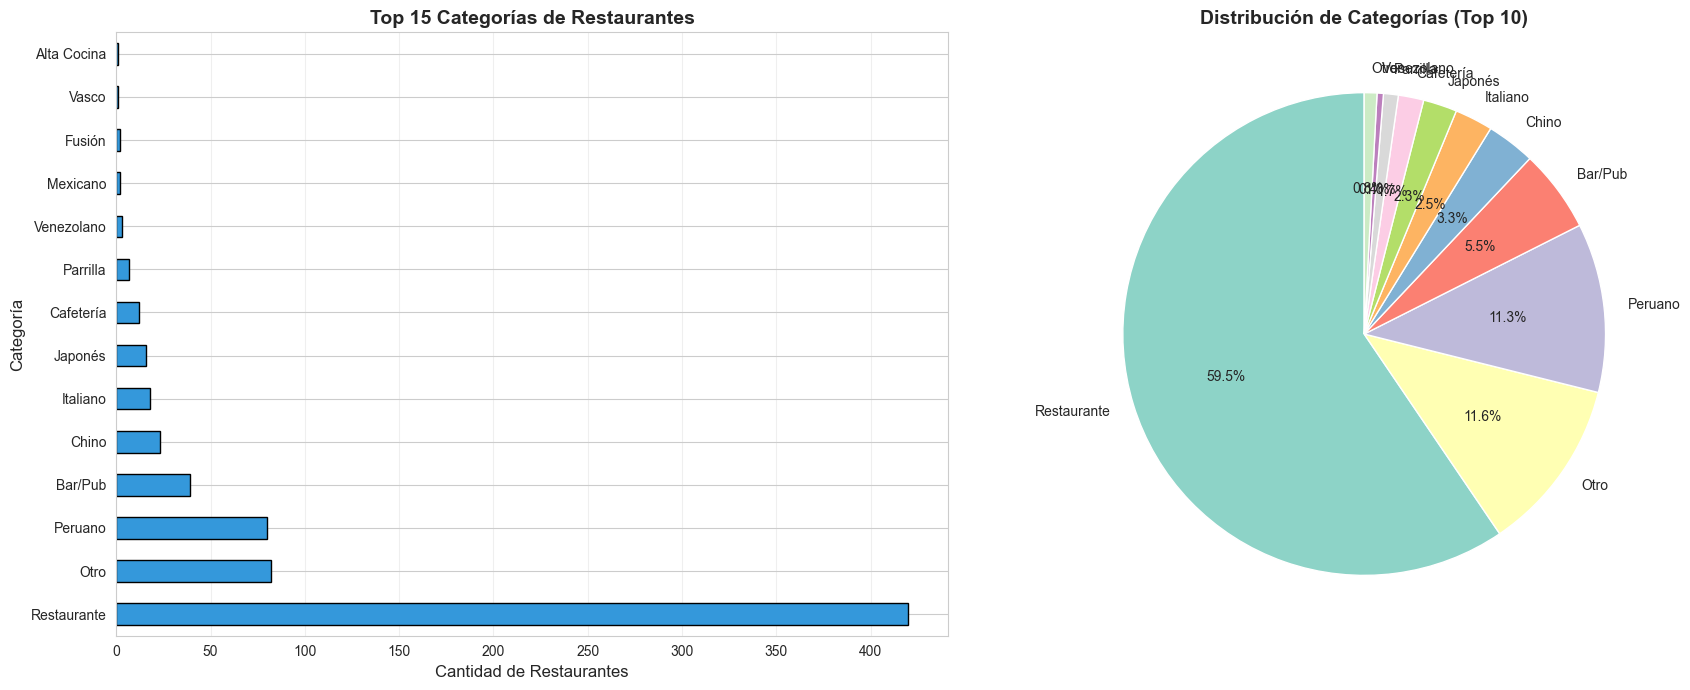


📊 Total de categorías: 14

Top 10 categorías:
   1. Restaurante: 420 (59.5%)
   2. Otro: 82 (11.6%)
   3. Peruano: 80 (11.3%)
   4. Bar/Pub: 39 (5.5%)
   5. Chino: 23 (3.3%)
   6. Italiano: 18 (2.5%)
   7. Japonés: 16 (2.3%)
   8. Cafetería: 12 (1.7%)
   9. Parrilla: 7 (1.0%)
   10. Venezolano: 3 (0.4%)


In [16]:
## 5. Análisis por Categorías
# Distribución de categorías
category_counts = df['category_clean'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de barras
category_counts.head(15).plot(kind='barh', ax=axes[0], color='#3498db', edgecolor='black')
axes[0].set_xlabel('Cantidad de Restaurantes', fontsize=12)
axes[0].set_ylabel('Categoría', fontsize=12)
axes[0].set_title('Top 15 Categorías de Restaurantes', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Gráfico de torta (top 10)
top_categories = category_counts.head(10)
others = category_counts[10:].sum()
if others > 0:
    top_categories['Otros'] = others

colors = plt.cm.Set3(range(len(top_categories)))
axes[1].pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%',
            startangle=90, colors=colors, textprops={'fontsize': 10})
axes[1].set_title('Distribución de Categorías (Top 10)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(figures_path / 'categorias_restaurantes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📊 Total de categorías: {df['category_clean'].nunique()}")
print(f"\nTop 10 categorías:")
for i, (cat, count) in enumerate(category_counts.head(10).items(), 1):
    pct = (count / len(df)) * 100
    print(f"   {i}. {cat}: {count} ({pct:.1f}%)")

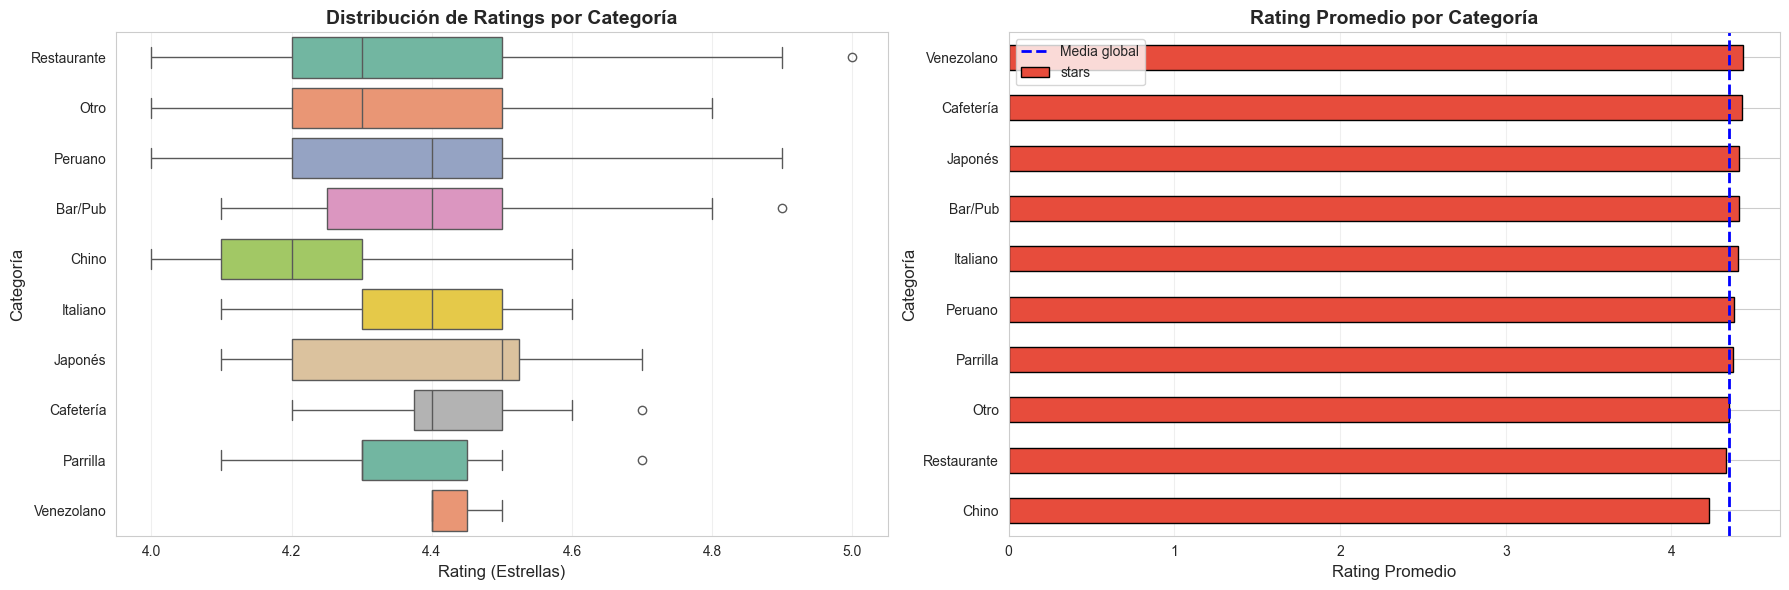


📊 Estadísticas por Categoría (Top 10):

                Rating_Promedio  Rating_Std  Cantidad  Reviews_Promedio  \
category_clean                                                            
Venezolano                 4.43        0.06         3           2576.33   
Cafetería                  4.42        0.15        12            806.58   
Bar/Pub                    4.41        0.20        39           1207.51   
Japonés                    4.41        0.21        16           1236.25   
Italiano                   4.40        0.15        18           1230.67   
Peruano                    4.38        0.21        80           2355.45   
Parrilla                   4.37        0.19         7           1953.00   
Otro                       4.35        0.19        82           1698.54   
Restaurante                4.33        0.20       420           1016.86   
Chino                      4.23        0.16        23            903.22   

                Popularity  
category_clean              


In [17]:
# Visualización 4: Ratings por Categoría (Top 10)
top_10_categories = category_counts.head(10).index
df_top_cat = df[df['category_clean'].isin(top_10_categories)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot
sns.boxplot(data=df_top_cat, y='category_clean', x='stars', ax=axes[0],
            palette='Set2', order=top_10_categories)
axes[0].set_xlabel('Rating (Estrellas)', fontsize=12)
axes[0].set_ylabel('Categoría', fontsize=12)
axes[0].set_title('Distribución de Ratings por Categoría', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Promedio de rating por categoría
category_stats = df_top_cat.groupby('category_clean')['stars'].mean().sort_values(ascending=True)
category_stats.plot(kind='barh', ax=axes[1], color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Rating Promedio', fontsize=12)
axes[1].set_ylabel('Categoría', fontsize=12)
axes[1].set_title('Rating Promedio por Categoría', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].axvline(df['stars'].mean(), color='blue', linestyle='--', linewidth=2, label='Media global')
axes[1].legend()

plt.tight_layout()
plt.savefig(figures_path / 'ratings_por_categoria.png', dpi=300, bbox_inches='tight')
plt.show()

# Estadísticas detalladas por categoría
print("\n📊 Estadísticas por Categoría (Top 10):\n")
cat_stats = df_top_cat.groupby('category_clean').agg({
    'stars': ['mean', 'std', 'count'],
    'reviews': 'mean',
    'popularity_score': 'mean'
}).round(2)
cat_stats.columns = ['Rating_Promedio', 'Rating_Std', 'Cantidad', 'Reviews_Promedio', 'Popularity']
cat_stats = cat_stats.sort_values('Rating_Promedio', ascending=False)
print(cat_stats)

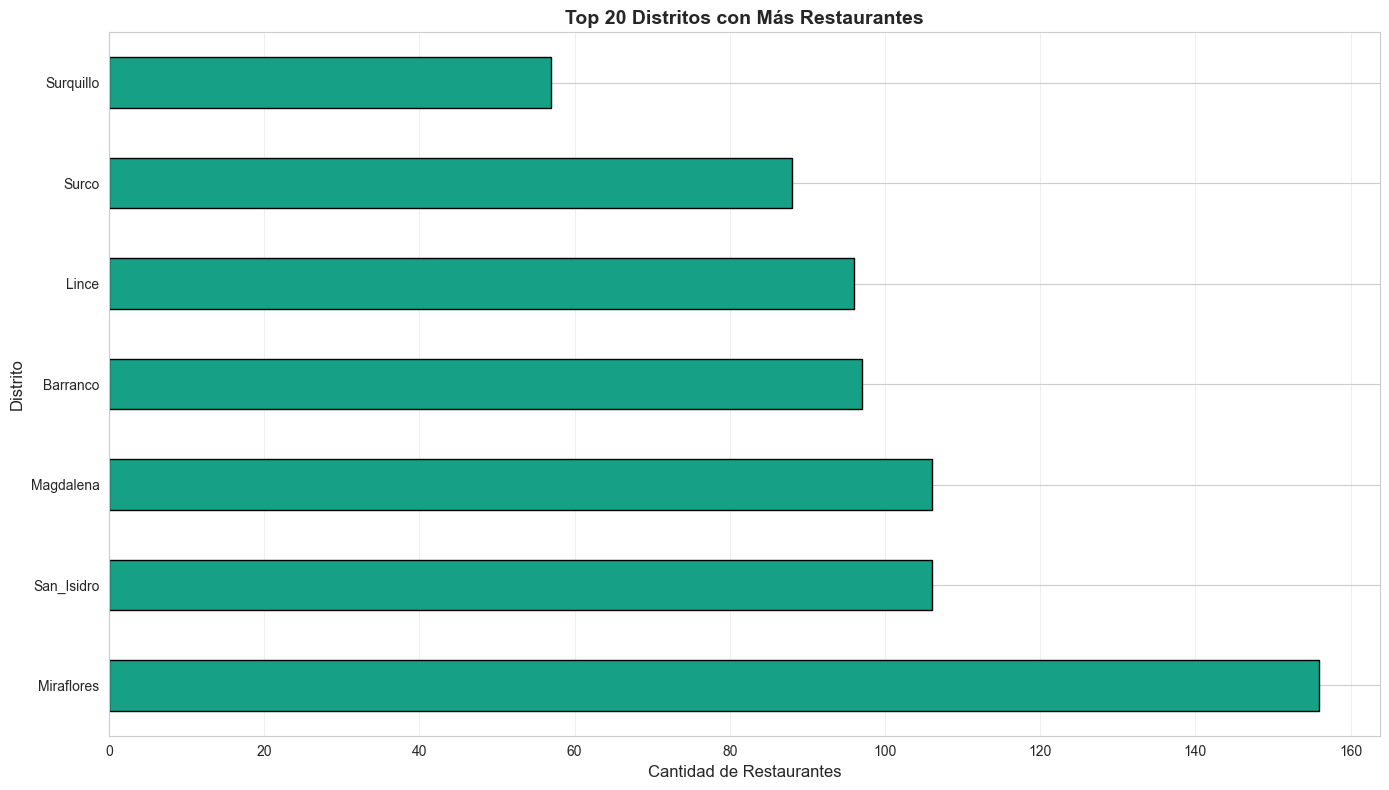


📍 Total de distritos: 7

Top 10 distritos:
   1. Miraflores: 156 (22.1%)
   2. San_Isidro: 106 (15.0%)
   3. Magdalena: 106 (15.0%)
   4. Barranco: 97 (13.7%)
   5. Lince: 96 (13.6%)
   6. Surco: 88 (12.5%)
   7. Surquillo: 57 (8.1%)


In [18]:
## 6. Análisis Geoespacial
# Distribución por distrito
district_counts = df['district'].value_counts().head(20)

plt.figure(figsize=(14, 8))
district_counts.plot(kind='barh', color='#16a085', edgecolor='black')
plt.xlabel('Cantidad de Restaurantes', fontsize=12)
plt.ylabel('Distrito', fontsize=12)
plt.title('Top 20 Distritos con Más Restaurantes', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(figures_path / 'distritos_restaurantes.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📍 Total de distritos: {df['district'].nunique()}")
print(f"\nTop 10 distritos:")
for i, (dist, count) in enumerate(district_counts.head(10).items(), 1):
    pct = (count / len(df)) * 100
    print(f"   {i}. {dist}: {count} ({pct:.1f}%)")

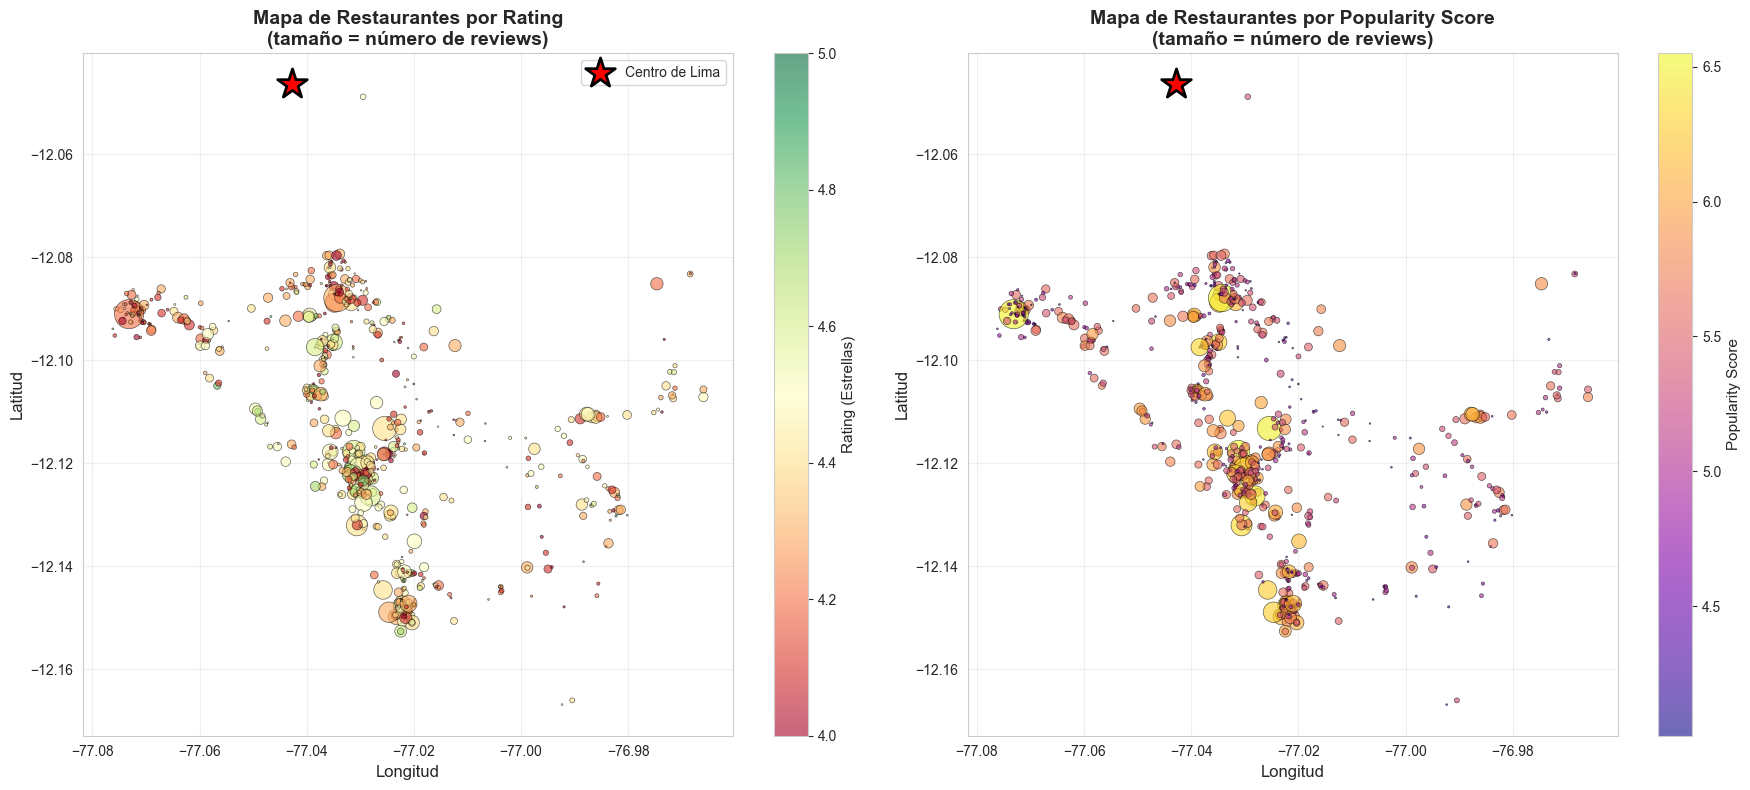


📍 Análisis Geoespacial:
   - Distancia promedio al centro: 7.79 km
   - Distancia mediana: 7.97 km
   - Distancia máxima: 14.50 km
   - Rango de latitud: [-12.1669, -12.0488]
   - Rango de longitud: [-77.0762, -76.9659]


In [19]:
# Visualización 5: Mapa de Calor Geoespacial
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Scatter plot por rating
scatter = axes[0].scatter(df['long'], df['lat'],
                         c=df['stars'], cmap='RdYlGn',
                         s=df['reviews']/50, alpha=0.6,
                         edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitud', fontsize=12)
axes[0].set_ylabel('Latitud', fontsize=12)
axes[0].set_title('Mapa de Restaurantes por Rating\n(tamaño = número de reviews)',
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter, ax=axes[0])
cbar1.set_label('Rating (Estrellas)', fontsize=11)

# Scatter plot por popularidad
scatter2 = axes[1].scatter(df['long'], df['lat'],
                          c=df['popularity_score'], cmap='plasma',
                          s=df['reviews']/50, alpha=0.6,
                          edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('Longitud', fontsize=12)
axes[1].set_ylabel('Latitud', fontsize=12)
axes[1].set_title('Mapa de Restaurantes por Popularity Score\n(tamaño = número de reviews)',
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Popularity Score', fontsize=11)

# Marcar centro de Lima
center_lat, center_long = -12.0464, -77.0428
axes[0].scatter(center_long, center_lat, marker='*', s=500, c='red',
               edgecolors='black', linewidth=2, label='Centro de Lima', zorder=5)
axes[0].legend(fontsize=10)
axes[1].scatter(center_long, center_lat, marker='*', s=500, c='red',
               edgecolors='black', linewidth=2, zorder=5)

plt.tight_layout()
plt.savefig(figures_path / 'mapa_geoespacial.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n📍 Análisis Geoespacial:")
print(f"   - Distancia promedio al centro: {df['distance_to_center_km'].mean():.2f} km")
print(f"   - Distancia mediana: {df['distance_to_center_km'].median():.2f} km")
print(f"   - Distancia máxima: {df['distance_to_center_km'].max():.2f} km")
print(f"   - Rango de latitud: [{df['lat'].min():.4f}, {df['lat'].max():.4f}]")
print(f"   - Rango de longitud: [{df['long'].min():.4f}, {df['long'].max():.4f}]")

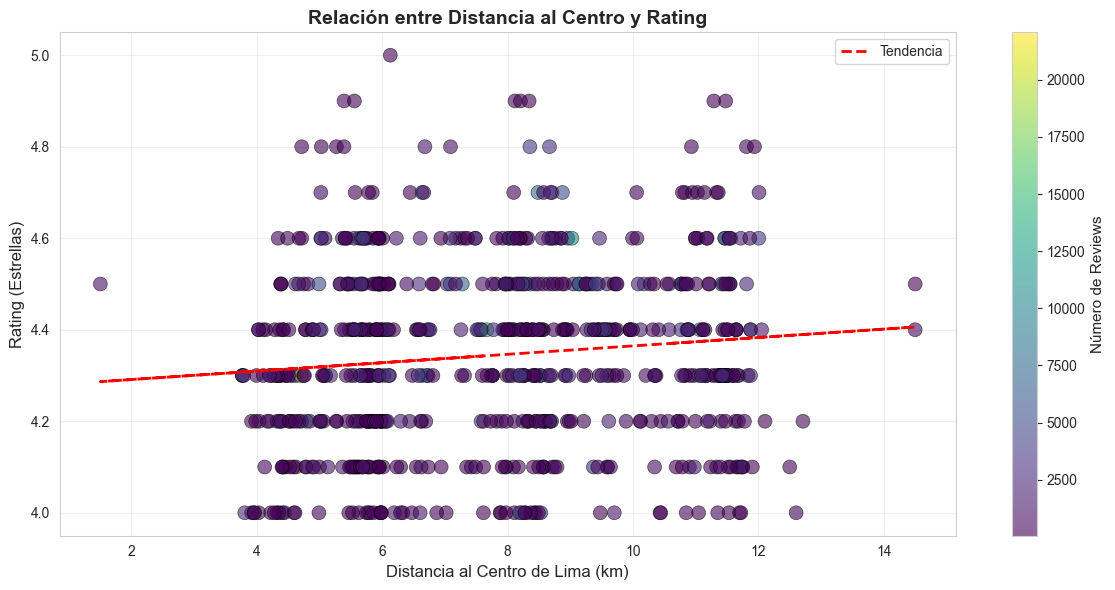


📊 Correlación Distancia-Rating: 0.109
   → La distancia al centro NO afecta significativamente el rating


In [20]:
# Distancia vs Rating
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['distance_to_center_km'], df['stars'],
                    c=df['reviews'], cmap='viridis', s=100, alpha=0.6,
                    edgecolors='black', linewidth=0.5)
ax.set_xlabel('Distancia al Centro de Lima (km)', fontsize=12)
ax.set_ylabel('Rating (Estrellas)', fontsize=12)
ax.set_title('Relación entre Distancia al Centro y Rating', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Número de Reviews', fontsize=11)

# Línea de tendencia
z = np.polyfit(df['distance_to_center_km'], df['stars'], 1)
p = np.poly1d(z)
ax.plot(df['distance_to_center_km'], p(df['distance_to_center_km']), "r--", linewidth=2, label='Tendencia')
ax.legend()

plt.tight_layout()
plt.savefig(figures_path / 'distancia_vs_rating.png', dpi=300, bbox_inches='tight')
plt.show()

corr_dist_rating = df[['distance_to_center_km', 'stars']].corr().iloc[0, 1]
print(f"\n📊 Correlación Distancia-Rating: {corr_dist_rating:.3f}")
print(f"   → La distancia al centro {'NO' if abs(corr_dist_rating) < 0.3 else ''} afecta significativamente el rating")

In [21]:
## 7. Top Restaurantes
# Top 20 restaurantes por popularity score
top_20 = df.nlargest(20, 'popularity_score')[['title', 'category_clean', 'district', 'stars', 'reviews', 'popularity_score']]

print("="*100)
print("🏆 TOP 20 RESTAURANTES DE LIMA (por Popularity Score)")
print("="*100)
print(top_20.to_string(index=False))
print("="*100)

🏆 TOP 20 RESTAURANTES DE LIMA (por Popularity Score)
                                  title category_clean   district  stars  reviews  popularity_score
                  Panchita - Miraflores        Peruano Miraflores    4.6    12925              6.55
                      Siete Sopas Lince        Peruano      Lince    4.3    19373              6.53
                   Mercado de Magdalena           Otro  Magdalena    4.2    22080              6.52
                  Siete Sopas Surquillo    Restaurante  Surquillo    4.4    15167              6.49
                             Punto Azul           Otro Miraflores    4.6    10682              6.47
          Mollys Irish Bar & Restaurant        Bar/Pub Miraflores    4.7     8118              6.42
                                 Mangos        Peruano Miraflores    4.4    11343              6.37
                         Swissôtel Lima           Otro San_Isidro    4.6     7772              6.34
           La Lucha Sangucheria Criolla        

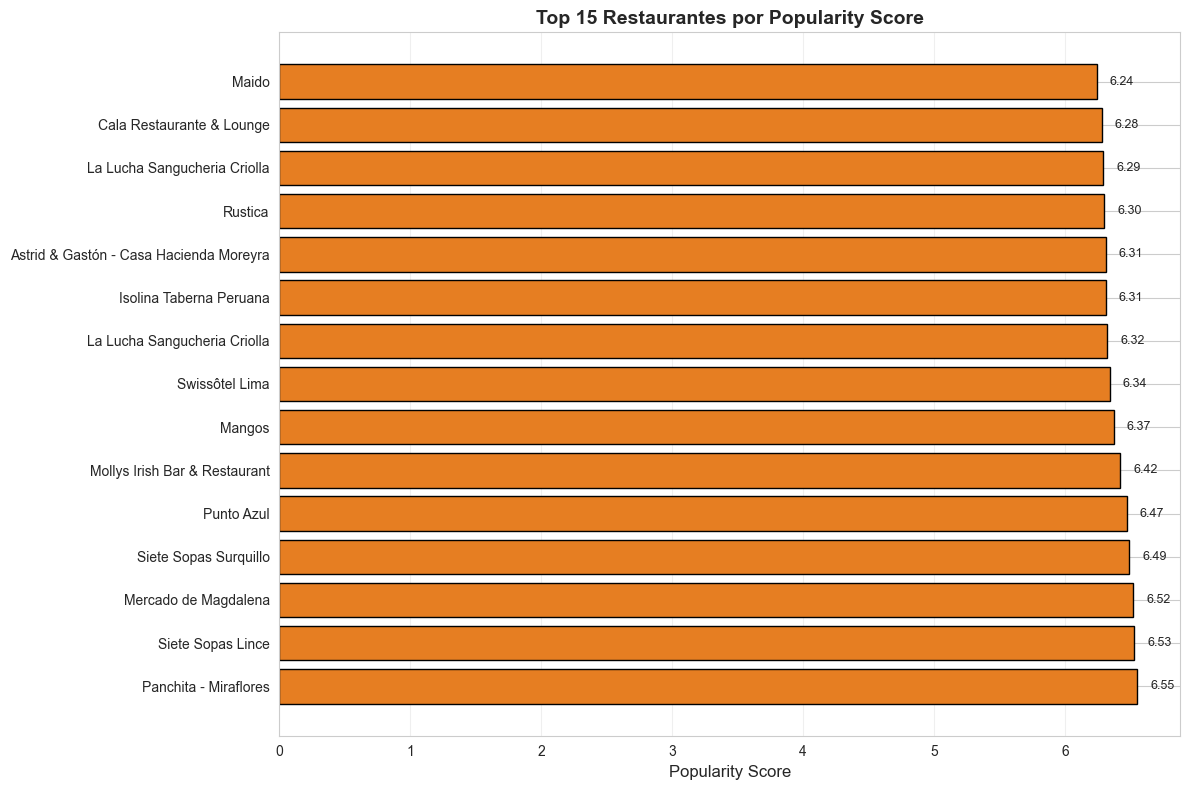

In [22]:
# Visualización de Top 15
top_15 = df.nlargest(15, 'popularity_score')

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(top_15)), top_15['popularity_score'], color='#e67e22', edgecolor='black')
ax.set_yticks(range(len(top_15)))
ax.set_yticklabels(top_15['title'], fontsize=10)
ax.set_xlabel('Popularity Score', fontsize=12)
ax.set_title('Top 15 Restaurantes por Popularity Score', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, (bar, score) in enumerate(zip(bars, top_15['popularity_score'])):
    ax.text(score + 0.1, i, f'{score:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(figures_path / 'top_restaurantes.png', dpi=300, bbox_inches='tight')
plt.show()

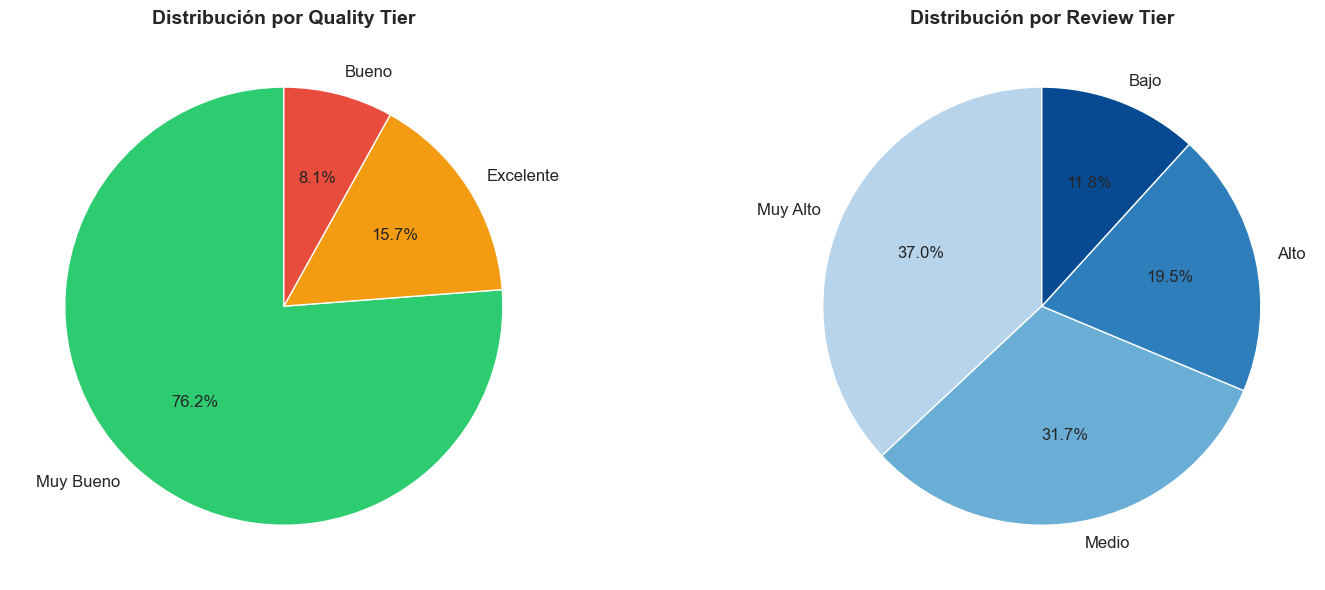


📊 Distribución por Quality Tier:
   - Muy Bueno: 538 (76.2%)
   - Excelente: 111 (15.7%)
   - Bueno: 57 (8.1%)

📊 Distribución por Review Tier:
   - Muy Alto: 261 (37.0%)
   - Medio: 224 (31.7%)
   - Alto: 138 (19.5%)
   - Bajo: 83 (11.8%)


In [23]:
## 8. Análisis de Tiers de Calidad
# Distribución por tiers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Quality tier
quality_counts = df['quality_tier'].value_counts()
colors_quality = ['#2ecc71', '#f39c12', '#e74c3c']
axes[0].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_quality, textprops={'fontsize': 12})
axes[0].set_title('Distribución por Quality Tier', fontsize=14, fontweight='bold')

# Review tier
review_counts = df['review_tier'].value_counts()
colors_review = plt.cm.Blues(np.linspace(0.3, 0.9, len(review_counts)))
axes[1].pie(review_counts.values, labels=review_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors_review, textprops={'fontsize': 12})
axes[1].set_title('Distribución por Review Tier', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(figures_path / 'distribucion_tiers.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Distribución por Quality Tier:")
for tier, count in quality_counts.items():
    pct = (count / len(df)) * 100
    print(f"   - {tier}: {count} ({pct:.1f}%)")

print("\n📊 Distribución por Review Tier:")
for tier, count in review_counts.items():
    pct = (count / len(df)) * 100
    print(f"   - {tier}: {count} ({pct:.1f}%)")

In [24]:
## 9. Conclusiones del EDA
print("="*100)
print("📋 CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("="*100)

print("\n1. CALIDAD DEL DATASET:")
print(f"   ✅ {len(df)} restaurantes de alta calidad (rating ≥ 4.0, reviews ≥ 50)")
print(f"   ✅ {df['district'].nunique()} distritos de Lima cubiertos")
print(f"   ✅ {df['category_clean'].nunique()} categorías de restaurantes")
print(f"   ✅ {df_reviews.shape[0]:,} reviews individuales disponibles")

print("\n2. DISTRIBUCIÓN DE RATINGS:")
print(f"   📊 Rating promedio: {df['stars'].mean():.2f} ⭐")
print(f"   📊 Desviación estándar: {df['stars'].std():.3f} (baja variabilidad)")
print(f"   💡 La mayoría de restaurantes tiene ratings entre 4.0 y 4.6")
print(f"   💡 Distribución ligeramente sesgada hacia ratings altos")

print("\n3. POPULARIDAD (REVIEWS):")
print(f"   📊 Promedio: {df['reviews'].mean():.0f} reviews por restaurante")
print(f"   📊 Mediana: {df['reviews'].median():.0f} reviews (mitad tiene menos)")
print(f"   💡 Distribución long-tail: pocos restaurantes muy populares")
print(f"   💡 Top 10% tiene > {df['reviews'].quantile(0.90):.0f} reviews")

print("\n4. CORRELACIONES CLAVE:")
corr_rev_rating = df[['reviews', 'stars']].corr().iloc[0, 1]
corr_dist_rating = df[['distance_to_center_km', 'stars']].corr().iloc[0, 1]
corr_pop_rating = df[['popularity_score', 'stars']].corr().iloc[0, 1]
print(f"   📊 Reviews vs Rating: {corr_rev_rating:.3f} (correlación débil)")
print(f"   📊 Distancia vs Rating: {corr_dist_rating:.3f}")
print(f"   📊 Popularity vs Rating: {corr_pop_rating:.3f}")
print(f"   💡 La popularidad NO garantiza mejor calidad")
print(f"   💡 La ubicación tiene {'poco' if abs(corr_dist_rating) < 0.2 else 'moderado'} impacto en el rating")

print("\n5. CATEGORÍAS DOMINANTES:")
top_3_cats = df['category_clean'].value_counts().head(3)
for i, (cat, count) in enumerate(top_3_cats.items(), 1):
    pct = (count / len(df)) * 100
    avg_rating = df[df['category_clean'] == cat]['stars'].mean()
    print(f"   {i}. {cat}: {count} restaurantes ({pct:.1f}%) - Rating: {avg_rating:.2f}⭐")

print("\n6. DISTRITOS PRINCIPALES:")
top_3_dist = df['district'].value_counts().head(3)
for i, (dist, count) in enumerate(top_3_dist.items(), 1):
    pct = (count / len(df)) * 100
    avg_rating = df[df['district'] == dist]['stars'].mean()
    print(f"   {i}. {dist}: {count} restaurantes ({pct:.1f}%) - Rating: {avg_rating:.2f}⭐")

print("\n7. INSIGHTS GEOESPACIALES:")
print(f"   📍 Distancia promedio al centro: {df['distance_to_center_km'].mean():.2f} km")
print(f"   📍 80% de restaurantes están a ≤ {df['distance_to_center_km'].quantile(0.8):.2f} km del centro")
print(f"   💡 Concentración en zonas urbanas centrales y turísticas")

print("\n8. RECOMENDACIONES PARA MODELADO:")
print("   ✅ Usar popularity_score como métrica compuesta (rating + reviews)")
print("   ✅ Normalizar reviews para evitar sesgo hacia restaurantes populares")
print("   ✅ Incluir features geoespaciales (distancia, cluster por zona)")
print("   ✅ Considerar categoría como feature importante")
print("   ✅ Aplicar clustering para segmentar restaurantes similares")
print("   ✅ Implementar sistema híbrido: content-based + collaborative filtering")

print("\n" + "="*100)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print(f"📁 Figuras guardadas en: {figures_path}")
print("="*100)

📋 CONCLUSIONES DEL ANÁLISIS EXPLORATORIO

1. CALIDAD DEL DATASET:
   ✅ 706 restaurantes de alta calidad (rating ≥ 4.0, reviews ≥ 50)
   ✅ 7 distritos de Lima cubiertos
   ✅ 14 categorías de restaurantes
   ✅ 378,969 reviews individuales disponibles

2. DISTRIBUCIÓN DE RATINGS:
   📊 Rating promedio: 4.34 ⭐
   📊 Desviación estándar: 0.202 (baja variabilidad)
   💡 La mayoría de restaurantes tiene ratings entre 4.0 y 4.6
   💡 Distribución ligeramente sesgada hacia ratings altos

3. POPULARIDAD (REVIEWS):
   📊 Promedio: 1275 reviews por restaurante
   📊 Mediana: 630 reviews (mitad tiene menos)
   💡 Distribución long-tail: pocos restaurantes muy populares
   💡 Top 10% tiene > 2973 reviews

4. CORRELACIONES CLAVE:
   📊 Reviews vs Rating: 0.101 (correlación débil)
   📊 Distancia vs Rating: 0.109
   📊 Popularity vs Rating: 0.310
   💡 La popularidad NO garantiza mejor calidad
   💡 La ubicación tiene poco impacto en el rating

5. CATEGORÍAS DOMINANTES:
   1. Restaurante: 420 restaurantes (59.5%) 

In [26]:
## 10. Exportar Resumen para el Informe
# Crear resumen en texto
summary_file = Path('../docs/eda_summary.txt')

with open(summary_file, 'w', encoding='utf-8') as f:
    f.write("="*100 + "\n")
    f.write("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS\n")
    f.write("Sistema de Recomendación de Restaurantes - Lima\n")
    f.write("="*100 + "\n\n")

    f.write(f"Dataset: {len(df)} restaurantes de alta calidad\n")
    f.write(f"Reviews: {df_reviews.shape[0]:,} reseñas individuales\n")
    f.write(f"Distritos: {df['district'].nunique()}\n")
    f.write(f"Categorías: {df['category_clean'].nunique()}\n\n")

    f.write("MÉTRICAS CLAVE:\n")
    f.write(f"  - Rating promedio: {df['stars'].mean():.2f} ⭐\n")
    f.write(f"  - Reviews promedio: {df['reviews'].mean():.0f}\n")
    f.write(f"  - Popularity score promedio: {df['popularity_score'].mean():.2f}\n")
    f.write(f"  - Distancia promedio al centro: {df['distance_to_center_km'].mean():.2f} km\n\n")

    f.write("TOP 10 RESTAURANTES:\n")
    top_10 = df.nlargest(10, 'popularity_score')
    for i, row in enumerate(top_10.itertuples(), 1):
        f.write(f"  {i}. {row.title}: {row.stars}⭐ ({row.reviews} reviews) - Score: {row.popularity_score}\n")

print(f"✅ Resumen exportado a: {summary_file}")


✅ Resumen exportado a: ..\docs\eda_summary.txt
